In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from scipy.stats import linregress
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Visualizar los conjuntos borrosos

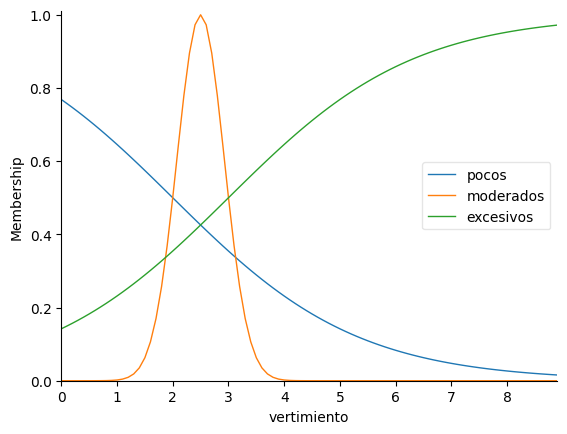

In [2]:
# Cantidad de quejas
# Universos de discursos y la fuzzificación de las variables
vertimiento = ctrl.Antecedent(np.arange(0, 9, 0.1), 'vertimiento')
vertimiento['pocos'] = fuzz.sigmf(vertimiento.universe, 2, -0.6)
vertimiento['moderados'] = fuzz.gaussmf(vertimiento.universe, 2.5, 0.425)
vertimiento['excesivos'] = fuzz.sigmf(vertimiento.universe, 3, 0.6)
vertimiento.view() 


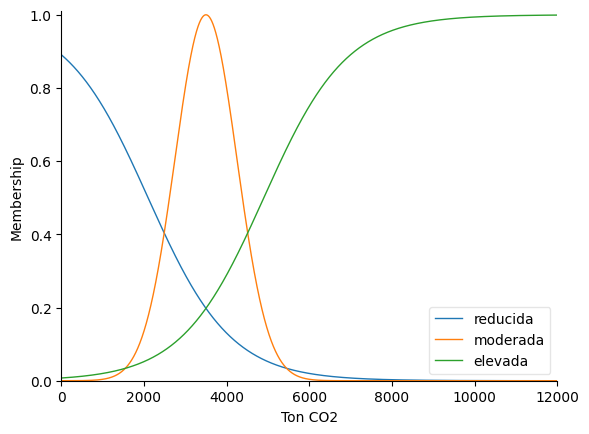

In [3]:
# Monto de compras
# Universo de discurso y fuzzificaci[on de las variables
ton_CO2 = ctrl.Antecedent(np.arange(0, 12001, 1), 'Ton CO2')
ton_CO2['reducida'] = fuzz.sigmf(ton_CO2.universe, 2100, -0.001)
ton_CO2['moderada'] = fuzz.gaussmf(ton_CO2.universe, 3500, 750)
ton_CO2['elevada'] = fuzz.sigmf(ton_CO2.universe, 4900, 0.001)
ton_CO2.view()

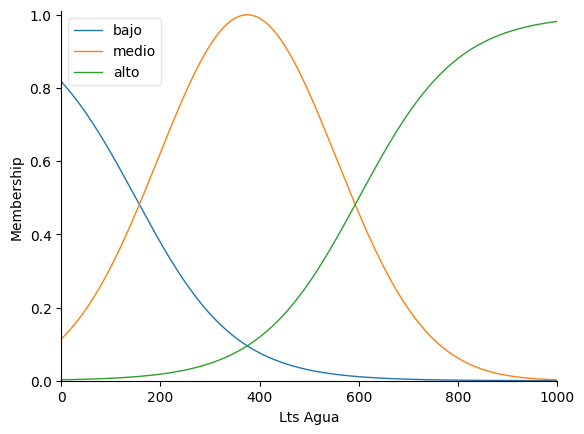

In [4]:
# Monto de compras
# Universo de discurso y fuzzificaci[on de las variables
lts_Agua = ctrl.Antecedent(np.arange(0, 1001, 1), 'Lts Agua')
lts_Agua['bajo'] = fuzz.sigmf(lts_Agua.universe, 150, -0.01)
lts_Agua['medio'] = fuzz.gaussmf(lts_Agua.universe, 375, 180)
lts_Agua['alto'] = fuzz.sigmf(lts_Agua.universe, 600, 0.01)
lts_Agua.view()

# 2. Declarar los antecedentes para el SIB TSK

In [5]:
vertimiento = np.arange(0, 9, 1)
vertimiento_pocos = fuzz.sigmf(vertimiento, 2, -0.6)
vertimiento_moderados = fuzz.gaussmf(vertimiento, 2.5, 0.425)
vertimiento_excesivos = fuzz.sigmf(vertimiento, 3, 0.6)

ton_CO2 = np.arange(0, 12001, 1)
ton_CO2_reducida = fuzz.sigmf(ton_CO2, 2100, -0.001)
ton_CO2_moderada = fuzz.gaussmf(ton_CO2, 3500, 750)
ton_CO2_elevada = fuzz.sigmf(ton_CO2, 4900, 0.001)

lts_Agua = np.arange(0, 1001, 1)
lts_Agua_bajo = fuzz.sigmf(lts_Agua, 150, -0.01)
lts_Agua_medio = fuzz.gaussmf(lts_Agua, 375, 180)
lts_Agua_alto = fuzz.sigmf(lts_Agua, 600, 0.01)


# 3. Obtener las funciones afines del consecuente

In [6]:
l1 = linregress([0, 2], [0, 0.15])
l2 = linregress([2, 3], [0.15, 0.5])
l3 = linregress([3, 7], [0.5, 0.85])
l4 = linregress([0, 2100], [0, 0.15])
l5 = linregress([2100, 4900], [0.15, 0.5])
l6 = linregress([4900, 10500], [0.5, 0.85])
l7 = linregress([0, 150], [0, 0.15])
l8 = linregress([150, 600], [0.15, 0.5])
l9 = linregress([600, 850], [0.5, 0.85])

m1 = l1.slope
b1 = l1.intercept

m2 = l2.slope
b2 = l2.intercept

m3 = l3.slope
b3 = l3.intercept

m4 = l4.slope
b4 = l4.intercept

m5 = l5.slope
b5 = l5.intercept

m6 = l6.slope
b6 = l6.intercept

m7 = l7.slope
b7 = l7.intercept

m8 = l8.slope
b8 = l8.intercept

m9 = l9.slope
b9 = l9.intercept

In [7]:
def p147 (v, t, l):
    return m1*v + b1 + m4*t + b4 + m7*l + b7

def p148 (v, t, l):
    return m1*v + b1 + m4*t + b4 + m8*l + b8

def p149 (v, t, l):
    return m1*v + b1 + m4*t + b4 + m9*l + b9

def p157 (v, t, l):
    return m1*v + b1 + m5*t + b5 + m7*l + b7

def p158 (v, t, l):
    return m1*v + b1 + m5*t + b5 + m8*l + b8

def p159 (v, t, l):
    return m1*v + b1 + m5*t + b5 + m9*l + b9

def p167 (v, t, l):
    return m1*v + b1 + m6*t + b6 + m7*l + b7

def p168 (v, t, l):
    return m1*v + b1 + m6*t + b6 + m8*l + b8

def p169 (v, t, l):
    return m1*v + b1 + m6*t + b6 + m9*l + b9

def p247 (v, t, l):
    return m2*v + b2 + m4*t + b4 + m7*l + b7

def p248 (v, t, l):
    return m2*v + b2 + m4*t + b4 + m8*l + b8

def p249 (v, t, l):
    return m2*v + b2 + m4*t + b4 + m9*l + b9

def p257 (v, t, l):
    return m2*v + b2 + m5*t + b5 + m7*l + b7

def p258 (v, t, l):
    return m2*v + b2 + m5*t + b5 + m8*l + b8

def p259 (v, t, l):
    return m2*v + b2 + m5*t + b5 + m9*l + b9

def p267 (v, t, l):
    return m2*v + b2 + m6*t + b6 + m7*l + b7

def p268 (v, t, l):
    return m2*v + b2 + m6*t + b6 + m8*l + b8

def p269 (v, t, l):
    return m2*v + b2 + m6*t + b6 + m9*l + b9

def p347 (v, t, l):
    return m3*v + b3 + m4*t + b4 + m7*l + b7

def p348 (v, t, l):
    return m3*v + b3 + m4*t + b4 + m8*l + b8

def p349 (v, t, l):
    return m3*v + b3 + m4*t + b4 + m9*l + b9

def p357 (v, t, l):
    return m3*v + b3 + m5*t + b5 + m7*l + b7

def p358 (v, t, l):
    return m3*v + b3 + m5*t + b5 + m8*l + b8

def p359 (v, t, l):
    return m3*v + b3 + m5*t + b5 + m9*l + b9

def p367 (v, t, l):
    return m3*v + b3 + m6*t + b6 + m7*l + b7

def p368 (v, t, l):
    return m3*v + b3 + m6*t + b6 + m8*l + b8

def p369 (v, t, l):
    return m3*v + b3 + m6*t + b6 + m9*l + b9
    

# 4. Crear la base de conocimientos

In [8]:
def regla_1 (v, t, l):
    mu1 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu1

def regla_2 (v, t, l):
    mu2 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu2

def regla_3 (v, t, l):
    mu3 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu3

def regla_4 (v, t, l):
    mu4 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu4

def regla_5 (v, t, l):
    mu5 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu5

def regla_6 (v, t, l):
    mu6 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu6

def regla_7 (v, t, l):
    mu7 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu7

def regla_8 (v, t, l):
    mu8 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu8

def regla_9 (v, t, l):
    mu9 = min(fuzz.interp_membership(vertimiento, vertimiento_pocos, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu9

def regla_10 (v, t, l):
    mu10 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu10

def regla_11 (v, t, l):
    mu11 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu11

def regla_12 (v, t, l):
    mu12 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu12

def regla_13 (v, t, l):
    mu13 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu13

def regla_14 (v, t, l):
    mu14 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu14

def regla_15 (v, t, l):
    mu15 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu15

def regla_16 (v, t, l):
    mu16 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu16

def regla_17 (v, t, l):
    mu17 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu17

def regla_18 (v, t, l):
    mu18 = min(fuzz.interp_membership(vertimiento, vertimiento_moderados, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu18

def regla_19 (v, t, l):
    mu19 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu19

def regla_20 (v, t, l):
    mu20 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu20

def regla_21 (v, t, l):
    mu21 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_reducida, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu21

def regla_22 (v, t, l):
    mu22 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu22

def regla_23 (v, t, l):
    mu23 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu23

def regla_24 (v, t, l):
    mu24 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_moderada, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu24

def regla_25 (v, t, l):
    mu25 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_bajo, l))
    return mu25

def regla_26 (v, t, l):
    mu26 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_medio, l))
    return mu26

def regla_27 (v, t, l):
    mu27 = min(fuzz.interp_membership(vertimiento, vertimiento_excesivos, v), fuzz.interp_membership(ton_CO2, ton_CO2_elevada, t), fuzz.interp_membership(lts_Agua, lts_Agua_alto, l))
    return mu27


# 5. Construir el defuzzificador

In [9]:
def defuzzificador (v,t,l):
    r1 = p147(v,t,l)
    r2 = p148(v,t,l)
    r3 = p149(v,t,l)
    r4 = p157(v,t,l)
    r5 = p158(v,t,l)
    r6 = p159(v,t,l)
    r7 = p167(v,t,l)
    r8 = p168(v,t,l)
    r9 = p169(v,t,l)
    r10 = p247(v,t,l)
    r11 = p248(v,t,l)
    r12 = p249(v,t,l)
    r13 = p257(v,t,l)
    r14 = p258(v,t,l)
    r15 = p259(v,t,l)
    r16 = p267(v,t,l)
    r17 = p268(v,t,l)
    r18 = p269(v,t,l)
    r19 = p347(v,t,l)
    r20 = p348(v,t,l)
    r21 = p349(v,t,l)
    r22 = p357(v,t,l)
    r23 = p358(v,t,l)
    r24 = p359(v,t,l)
    r25 = p367(v,t,l)
    r26 = p368(v,t,l)
    r27 = p369(v,t,l)

    mu1 = regla_1(v,t,l)
    mu2 = regla_2(v,t,l)
    mu3 = regla_3(v,t,l)
    mu4 = regla_4(v,t,l)
    mu5 = regla_5(v,t,l)
    mu6 = regla_6(v,t,l)
    mu7 = regla_7(v,t,l)
    mu8 = regla_8(v,t,l)
    mu9 = regla_9(v,t,l)
    mu10 = regla_10(v,t,l)
    mu11 = regla_11(v,t,l)
    mu12 = regla_12(v,t,l)
    mu13 = regla_13(v,t,l)
    mu14 = regla_14(v,t,l)
    mu15 = regla_15(v,t,l)
    mu16 = regla_16(v,t,l)
    mu17 = regla_17(v,t,l)
    mu18 = regla_18(v,t,l)
    mu19 = regla_19(v,t,l)
    mu20 = regla_20(v,t,l)
    mu21 = regla_21(v,t,l)
    mu22 = regla_22(v,t,l)
    mu23 = regla_23(v,t,l)
    mu24 = regla_24(v,t,l)
    mu25 = regla_25(v,t,l)
    mu26 = regla_26(v,t,l)
    mu27 = regla_27(v,t,l)
    
    num = mu1*r1 + mu2*r2 + mu3*r3 + mu4*r4 + mu5*r5 + mu6*r6 + mu7*r7 + mu8*r8 + mu9*r9 + mu10*r10 + mu11*r11 + mu12*r12 + mu13*r13 + mu14*r14 + mu15*r15 + mu16*r16 + mu17*r17 + mu18*r18 + mu19*r19 + mu20*r20 + mu21*r21 + mu22*r22 + mu23*r23 + mu24*r24 + mu25*r25 + mu26*r26 + mu27*r27
    den = mu1 + mu2 + mu3 + mu4 + mu5 + mu6 + mu7 + mu8 + mu9 + mu10 + mu11 + mu12 + mu13 + mu14 + mu15 + mu16 + mu17 + mu18 + mu19 + mu20 + mu21 + mu22 + mu23 + mu24 + mu25 + mu26 + mu27
    return num/den

In [10]:
print(defuzzificador(2, 3500, 375))

0.8667859867978029


In [11]:
defuzzificador(2, 3700, 340)
print(f'Riesgo {100*defuzzificador(2, 3700, 340):.2f}%')
MAPE = abs(defuzzificador(2, 3700, 340) - 0.38)*100 / 0.38 
print("MAPE:", f'{MAPE:.2f}%')

Riesgo 86.82%
MAPE: 128.47%
